In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import rfpimp
import xgboost as xgb

import utils
from data_statistical_features import Segment, SegmentStatistical
import eda_utils

import os

plt.rcParams.update(utils.get_plt_settings())

save=True

/Users/zianor/.virtualenvs/venv/Bachelorarbeit/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df = pd.read_csv(utils.get_own_features_csv_path(segment_length=10, overlap_amount=0.9, hr_threshold=10, data_folder='data_patients'), index_col=False)
features = df.drop(Segment.get_feature_name_array(), axis='columns')
informative_inf = df[Segment.get_feature_name_array()]
target = df['informative']
patient_id=df['patient_id']


In [3]:
from ml_statistical_features import get_patient_split
x_train, x_test, y_train, y_test, groups_train, groups_test = get_patient_split(features, target, patient_id, test_size=0.33)
x_train = x_train.dropna()
x_test = x_test.dropna()
y_train = y_train.loc[x_train.index]
y_test = y_test.loc[x_test.index]
x_train = x_train.reindex().to_numpy()
y_train = y_train.reindex().to_numpy()
x_test = x_test.reindex().to_numpy()
y_test = y_test.reindex().to_numpy()

In [11]:
xgb_clf = xgb.XGBClassifier(random_state=1)
xgb_clf.fit(x_train, y_train, early_stopping_rounds=10, eval_set=[(x_test, y_test)])

[0]	validation_0-error:0.41669
Will train until validation_0-error hasn't improved in 10 rounds.
[1]	validation_0-error:0.37467
[2]	validation_0-error:0.43316
[3]	validation_0-error:0.37078
[4]	validation_0-error:0.38528
[5]	validation_0-error:0.38926
[6]	validation_0-error:0.36235
[7]	validation_0-error:0.35622
[8]	validation_0-error:0.35558
[9]	validation_0-error:0.35310
[10]	validation_0-error:0.35625
[11]	validation_0-error:0.35202
[12]	validation_0-error:0.34911
[13]	validation_0-error:0.34705
[14]	validation_0-error:0.34513
[15]	validation_0-error:0.34503
[16]	validation_0-error:0.34479
[17]	validation_0-error:0.34435
[18]	validation_0-error:0.34451
[19]	validation_0-error:0.34055
[20]	validation_0-error:0.34020
[21]	validation_0-error:0.33879
[22]	validation_0-error:0.33742
[23]	validation_0-error:0.33608
[24]	validation_0-error:0.33426
[25]	validation_0-error:0.33366
[26]	validation_0-error:0.33345
[27]	validation_0-error:0.33217
[28]	validation_0-error:0.33214
[29]	validation_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=1, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [14]:
xgb_clf.score(x_test, y_test)

0.6754190757456012

In [20]:
for col, val in sorted(zip(features.columns, xgb_clf.feature_importances_,), key=lambda x: x[1], reverse=True,):
    print(f"{col:10}{val:10.3f}")

sqi_coverage_04     0.236
hf_diff_data     0.127
sqi_coverage_05     0.094
hf_diff_acf     0.078
abs_energy     0.059
sqi_median     0.055
peak_frequency_acf     0.032
sqi_coverage_03     0.026
interval_lengths_std     0.024
sqi_mean       0.024
number_zero_crossings     0.023
peak_frequency_data     0.022
peak_mean      0.022
hf_ratio_acf     0.020
interval_lengths_range     0.019
skewness       0.018
hf_ratio_data     0.017
std            0.015
kurtosis       0.014
peak_max       0.012
template_corr_median_sqi_std     0.009
interval_lengths_mean     0.007
peak_std       0.007
template_corr_highest_sqi_std     0.007
sqi_min        0.007
sqi_max        0.006
interval_ranges_std     0.006
sqi_std        0.006
template_corr_median_sqi_mean     0.003
interval_stds_std     0.003
template_corr_highest_sqi_mean     0.002
interval_means_std     0.002
mean           0.001
peak_min       0.000


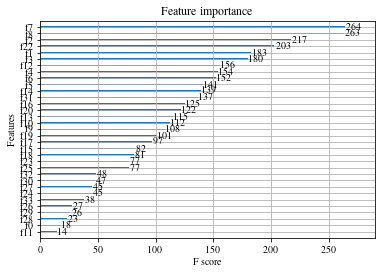

In [22]:
xgb.plot_importance(xgb_clf)